#**Lab 9**
Gale-Shapley and Irving Algorithms


###1. Find the best and worst cases for the Gale-Shapley and Irving ( [An Efficient Algorithm for the “Stable Roommates” Problem](http://www.dcs.gla.ac.uk/~pat/jchoco/roommates/papers/Comp_sdarticle.pdf)) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from copy import copy
import random, itertools, pprint, sys


In [49]:

def case(inicial, final):
  a=[]
  b=[]
  for h in range(inicial,final+1):
    b.append(h)
  for m in range(len(b)):
    x = random.randrange(len(b))
    a.append(b[x])
    b.remove(b[x])
  return a

def llenarLista(inicial1, inicial2,final1, final2):
  m = final1-inicial1 +1
  a = []
  for j in range(m*2):
      if (j < m): 
        a.append(case(inicial1, final1))
      else: 
        a.append(case(inicial2 ,final2))
  return a

def llenarDic(conjunto,inicial,index, final):
  n = final - inicial + 1
  dic = {}
  for i in range(n):
    dic[conjunto[i]] = case(inicial,final)
  df = pd.DataFrame(dic)
  df.index = index
  return df
      

In [64]:

#Galey-Shapley Algorithm
def matchingGS(man, woman, valores, tam):

  #Crear datagrama

  man_df = llenarDic(woman,valores,man,tam)
  woman_df = llenarDic(woman,valores,man,tam)

  print(man_df)
  print("-----------")
  print(woman_df)

  #Inicializacion datos 

  women_available = {men:woman for men in man }
  waiting_list = []
  proposals = {}
  count = 0

  #Mientras haya hombre solteros

  for i in range(tam): 

   while len(waiting_list) < len(man):

    #Propuesta

    for men in man:
      if men not in waiting_list:
        #Hacer propuesta al top
        women = women_available[men]
        best_choice = man_df.loc[men][man_df.loc[men].index.isin(women)].idxmin()
        proposals[(men, best_choice)] = (man_df.loc[men][best_choice], woman_df.loc[men][best_choice])         

        #Si hay mas de una propuesta
        overlays = Counter([key[1] for key in proposals.keys()])

        #Escoger la mejor opcion
        for women in overlays.keys():
          if overlays[women] > 1:
            pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() if women in pair}.items(), key= lambda x: x[1][1])[1:]

            #
            for p_to_drop in pairs_to_drop:
              del proposals[p_to_drop[0]]
              _women = copy(women_available[p_to_drop[0][0]])
              _women.remove(p_to_drop[0][1])
              women_available[p_to_drop[0][0]] = _women

    #Añadir hombre al waiting_list
    waiting_list = [men[0] for men in proposals.keys()]

    #update counter
    count += 1

  print("Las parejas estan formadas por: {0}".format(proposals))
  print("Veces contadas: {0}".format(count))
  return count


In [71]:
#Stable Marriage
#Escoger preferencia de la mujer entre m y m1
def wPrefersM1OverM(prefer,w,m,m1,N): 
  for i in range(N):
    if(prefer[w][i] == m1):
      return True
    if(prefer[w][i] == m):
      return False

def stableMarriage(prefer,N):
  #
  wPartner = [-1 for i in range(N)]
  #
  mFree = [False for i in range(N)]

  freeCount = N

  count = 0

  #Mientras haya hombres libres
  while (freeCount > 0):
    
    #Encontrar el primer hombre soltero
    m = 0
    while (m < N):
      if (mFree[m]==False):
        break
      m +=1

    #
    i = 0
    while i < N and mFree[m] == False:
      w = prefer[m][i]

      #
      if (wPartner[w-N] == -1):
        wPartner[w-N] = m
        mFree[m]= True
        freeCount -=1
      else:

        #Si la mujer no está libre
        m1 = wPartner[w-N]

        #Buscar la preferencia 
        if( wPrefersM1OverM(prefer,w,m,m1,N)==False):
          wPartner[w-N]= m
          mFree[m] = True
          mFree[m1] = False
        
      i += 1
      #update counter
      count += 1

  print("Woman","Man")
  for i in range(N):
    print(i + N, "\t", wPartner[i])
  print("Veces contadas: {0}".format(count))

  return count

$n=4$

In [62]:
a = 0
b = 0

In [113]:
man_list = ['a','b','c','d']
woman_list = ["A", "B", "C", "D"]
c = matchingGS(man_list,woman_list,1,4)
if c>a:
  a=c
elif c<b:
  b=c
if b == 0:
  b=c
print("El peor caso encontrado: {}".format(a))
print("El mejor caso encontrado: {}".format(b))

   A  B  C  D
a  1  2  4  2
b  2  1  1  1
c  4  4  2  3
d  3  3  3  4
-----------
   A  B  C  D
a  4  1  1  2
b  1  2  4  3
c  2  4  3  1
d  3  3  2  4
Las parejas estan formadas por: {('c', 'C'): (2, 3), ('d', 'A'): (3, 3), ('a', 'B'): (2, 1), ('b', 'D'): (1, 3)}
Veces contadas: 4
El peor caso encontrado: 6
El mejor caso encontrado: 1


In [82]:
x = 0
y = 0

In [112]:
prefer = llenarLista(0,4,3,7)
z = stableMarriage(prefer,4) 
print("---------")
print(prefer)
if z>x:
  x=z
elif z<y:
  y=z
if y == 0:
  y=z
print("El peor caso encontrado: {}".format(x))
print("El mejor caso encontrado: {}".format(y))

Woman Man
4 	 2
5 	 0
6 	 3
7 	 1
Veces contadas: 6
---------
[[1, 2, 3, 0], [3, 0, 1, 2], [1, 0, 3, 2], [0, 2, 1, 3], [7, 5, 4, 6], [6, 4, 7, 5], [7, 5, 6, 4], [4, 5, 7, 6]]
El peor caso encontrado: 12
El mejor caso encontrado: 4


$n=40$

In [115]:
a1= 0
b1= 0

In [125]:
man_list =   ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','ñ','o','p','q','r','s','t','u','v','w','x','y','z','aa','ab','ac','ad','ae','af','ag','ah','ai','aj','ak','al','am']
woman_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','Ñ','O','P','Q','R','S','T','U','V','W','X','Y','Z','AA','AB','AC','AD','AE','AF','AG','AH','AI','AJ','AK','AL','AM']
c1 = matchingGS(man_list,woman_list,1,40)
if c1>a1:
  a1=c1
elif c1<b1:
  b1=c1
if b1 == 0:
  b1=c1
print("El peor caso encontrado: {}".format(a1))
print("El mejor caso encontrado: {}".format(b1))

     A   B   C   D   E   F   G   H   I  ...  AE  AF  AG  AH  AI  AJ  AK  AL  AM
a   14  14  31  31  15  10   6   9  16  ...  31  12   4   9   7  39  11  20  33
b   23   5  37  26  30  36   4  10  28  ...  37  25  21  16   6  19  39  35   6
c    9  21   3  29  19  39  34  27  37  ...   2  13   9  22  38  17   3  32  34
d   32   4  33  30  35  13  23  25  35  ...   8  20  40  25  31   2  10  40  20
e   16  29  28  10  31  25  40  29  31  ...  24  22  26  38  17  15   5  14  38
f   13  37   6  32   2  27  14  13  36  ...  39  33  38  10  33  31  23  17  27
g   21  10  14  36  26   9  18  36  21  ...   7  29  25  29  37  35  33  26  24
h    5  31   8  11   1  30  32  17  39  ...  23  30  39  18   4  21   6  21  35
i   29  25  34   7  16  17  21  39  18  ...   4  35  29  12  20  36  28  39  25
j   39  16  15  13  29   2  17  37   5  ...  15  23   8  30  25  28   4  11  30
k   31   8   5  38  20  40  19  18  14  ...  26  28  11  37  28   1  15   7  17
l    6  19  23   8  10  14  30  19  19  

In [126]:
a2= 0
b2= 0

In [134]:
prefer = llenarLista(0,40,39,79)
c2= stableMarriage(prefer,40) 
if c2>a2:
  a2=c2
elif c2<b2:
  b2=c2
if b2 == 0:
  b2=c2
print("El peor caso encontrado: {}".format(a2))
print("El mejor caso encontrado: {}".format(b2))

Woman Man
40 	 25
41 	 31
42 	 20
43 	 0
44 	 19
45 	 18
46 	 35
47 	 16
48 	 11
49 	 24
50 	 8
51 	 26
52 	 14
53 	 22
54 	 3
55 	 27
56 	 7
57 	 17
58 	 5
59 	 10
60 	 2
61 	 34
62 	 12
63 	 28
64 	 9
65 	 6
66 	 13
67 	 15
68 	 23
69 	 36
70 	 4
71 	 1
72 	 32
73 	 33
74 	 21
75 	 30
76 	 29
77 	 39
78 	 38
79 	 37
Veces contadas: 281
El peor caso encontrado: 306
El mejor caso encontrado: 200


____________________________________________

###2. Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [18]:

#Galey-Shapley Algorithm
def matchingGSDis(man, woman, valores, tam):

  #Crear datagrama

  man_df = llenarDic(woman,valores,man,tam)
  woman_df = llenarDic(woman,valores,man,tam)
  #Inicializacion datos 

  women_available = {men:woman for men in man }
  waiting_list = []
  proposals = {}
  count = 0

  #Mientras haya hombre solteros

  for i in range(tam): 

   while len(waiting_list) < len(man):

    #Propuesta

    for men in man:
      if men not in waiting_list:
        #Hacer propuesta al top
        women = women_available[men]
        best_choice = man_df.loc[men][man_df.loc[men].index.isin(women)].idxmin()
        proposals[(men, best_choice)] = (man_df.loc[men][best_choice], woman_df.loc[men][best_choice])         

        #Si hay mas de una propuesta
        overlays = Counter([key[1] for key in proposals.keys()])

        #Escoger la mejor opcion
        for women in overlays.keys():
          if overlays[women] > 1:
            pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() if women in pair}.items(), key= lambda x: x[1][1])[1:]

            #
            for p_to_drop in pairs_to_drop:
              del proposals[p_to_drop[0]]
              _women = copy(women_available[p_to_drop[0][0]])
              _women.remove(p_to_drop[0][1])
              women_available[p_to_drop[0][0]] = _women

    #Añadir hombre al waiting_list
    waiting_list = [men[0] for men in proposals.keys()]

    #update counter
    count += 1

  return count



In [17]:
#Stable Marriage
def wPrefersM1OverM(prefer,w,m,m1,N): 
  for i in range(N):
    if(prefer[w][i] == m1):
      return True
    if(prefer[w][i] == m):
      return False

def stableMarriageDis(prefer,N):
  #
  wPartner = [-1 for i in range(N)]
  #
  mFree = [False for i in range(N)]

  freeCount = N

  count = 0

  #Mientras haya hombres libres
  while (freeCount > 0):
    
    #Encontrar el primer hombre soltero
    m = 0
    while (m < N):
      if (mFree[m]==False):
        break
      m +=1

    #
    i = 0
    while i < N and mFree[m] == False:
      w = prefer[m][i]

      #
      if (wPartner[w-N]==-1):
        wPartner[w-N] = m
        mFree[m]= True
        freeCount -=1
      else:

        #Si la mujer no está libre
        m1 = wPartner[w-N]

        #Buscar la preferencia 
        if( wPrefersM1OverM(prefer,w,m,m1,N)==False):
          wPartner[w-N]= m
          mFree[m] = True
          mFree[m1] = False
        
      i += 1
      #update counter
      count += 1

  return count

$n = 4$

El minimo numero de iteraciones es: 1
El promedio numero de iteraciones es: 2
El máximo numero de iteraciones es: 7


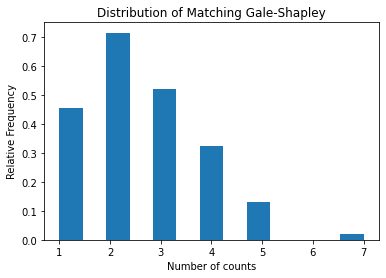

In [55]:
n = 100
nc_to_win = []
man_list = ['a','b','c','d']
woman_list = ["A", "B", "C", "D"]

for i in range(n):
    nc_to_win.append(matchingGSDis(man_list,woman_list,1,4))

plt.figure()
plt.hist(nc_to_win, density=True, bins=13)
plt.title("Distribution of Matching Gale-Shapley")
plt.xlabel("Number of counts")
plt.ylabel("Relative Frequency")
plt.show

print("El minimo numero de iteraciones es: {0}".format(min(nc_to_win)))
print("El promedio numero de iteraciones es: {0}".format(int(np.mean(nc_to_win))))
print("El máximo numero de iteraciones es: {0}".format(max(nc_to_win)))

El minimo numero de iteraciones es: 4
El promedio numero de iteraciones es: 7
El máximo numero de iteraciones es: 16


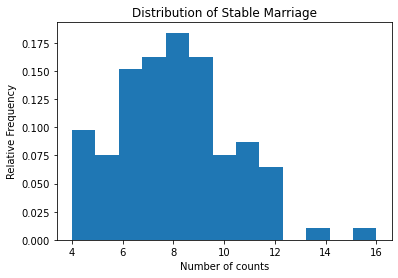

In [56]:
n = 100
nc_to_win = []

for i in range(n):

    prefer = llenarLista(0,4,3,7)
    nc_to_win.append(stableMarriageDis(prefer,4))

plt.figure()
plt.hist(nc_to_win, density=True, bins=13)
plt.title("Distribution of Stable Marriage")
plt.xlabel("Number of counts")
plt.ylabel("Relative Frequency")
plt.show

print("El minimo numero de iteraciones es: {0}".format(min(nc_to_win)))
print("El promedio numero de iteraciones es: {0}".format(int(np.mean(nc_to_win))))
print("El máximo numero de iteraciones es: {0}".format(max(nc_to_win)))

$n= 40$

El minimo numero de iteraciones es: 9
El promedio numero de iteraciones es: 37
El máximo numero de iteraciones es: 113


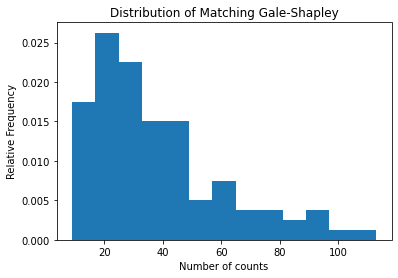

In [88]:
man_list =   ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','ñ','o','p','q','r','s','t','u','v','w','x','y','z','aa','ab','ac','ad','ae','af','ag','ah','ai','aj','ak','al','am']
woman_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','Ñ','O','P','Q','R','S','T','U','V','W','X','Y','Z','AA','AB','AC','AD','AE','AF','AG','AH','AI','AJ','AK','AL','AM']
nc_to_win = []


for i in range(n):
    nc_to_win.append(matchingGSDis(man_list,woman_list,1,40))

plt.figure()
plt.hist(nc_to_win, density=True, bins=13)
plt.title("Distribution of Matching Gale-Shapley")
plt.xlabel("Number of counts")
plt.ylabel("Relative Frequency")
plt.show

print("El minimo numero de iteraciones es: {0}".format(min(nc_to_win)))
print("El promedio numero de iteraciones es: {0}".format(int(np.mean(nc_to_win))))
print("El máximo numero de iteraciones es: {0}".format(max(nc_to_win)))

El minimo numero de iteraciones es: 102
El promedio numero de iteraciones es: 247
El máximo numero de iteraciones es: 428


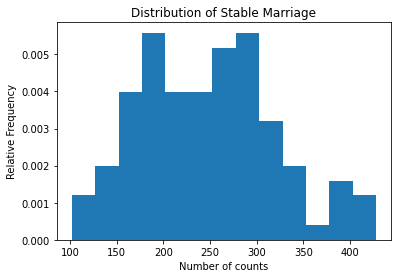

In [58]:
n = 100
nc_to_win = []
for i in range(n):

    prefer = llenarLista(0,40,39,79)
    nc_to_win.append(stableMarriageDis(prefer,40))

plt.figure()
plt.hist(nc_to_win, density=True, bins=13)
plt.title("Distribution of Stable Marriage")
plt.xlabel("Number of counts")
plt.ylabel("Relative Frequency")
plt.show

print("El minimo numero de iteraciones es: {0}".format(min(nc_to_win)))
print("El promedio numero de iteraciones es: {0}".format(int(np.mean(nc_to_win))))
print("El máximo numero de iteraciones es: {0}".format(max(nc_to_win)))